**Contextual Document Embeddings Framework:**

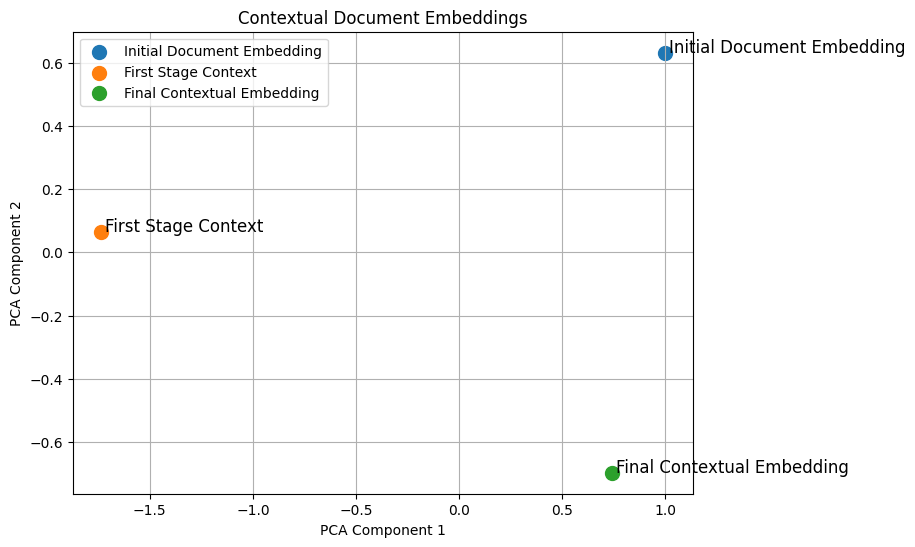

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to simulate embeddings of a document
def generate_embedding(seed, size=10):
    np.random.seed(seed)
    return np.random.randn(size)

# Simulating document and neighbor embeddings
def simulate_contextual_document_embedding(document_id, num_neighbors=5, embedding_size=10):
    # Generate main document embedding
    document_embedding = generate_embedding(document_id, size=embedding_size)

    # Generate embeddings for neighboring documents
    neighbor_embeddings = [generate_embedding(document_id + i + 1, size=embedding_size) for i in range(num_neighbors)]

    # First Stage: Aggregating neighbor information (simple average)
    first_stage_context = np.mean(np.array(neighbor_embeddings), axis=0)

    # Second Stage: Contextualizing the document embedding with neighbors
    final_embedding = document_embedding + first_stage_context

    return document_embedding, first_stage_context, final_embedding

# Visualize the embeddings in 2D space using PCA
def visualize_embeddings(document_embedding, first_stage_context, final_embedding):
    embeddings = np.array([document_embedding, first_stage_context, final_embedding])

    # Applying PCA to reduce the dimensionality to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)

    labels = ['Initial Document Embedding', 'First Stage Context', 'Final Contextual Embedding']

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=label, s=100)
        plt.text(embeddings_2d[i, 0] + 0.02, embeddings_2d[i, 1], label, fontsize=12)

    plt.title("Contextual Document Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
document_id = 42
document_embedding, first_stage_context, final_embedding = simulate_contextual_document_embedding(document_id)

# Visualize the embeddings at each stage
visualize_embeddings(document_embedding, first_stage_context, final_embedding)

In [ ]:
!pip install faiss-cpu sentence-transformers transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 15.6 MB/s eta 0:00:00


**Traditional RAG Embedding**

In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline

# Step 1: Load a sentence transformer model to compute embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Sample documents to be retrieved based on similarity
documents = [
    "The Eiffel Tower is located in Paris.",
    "The Great Wall of China is visible from space.",
    "Python is a versatile programming language.",
    "GPT-3 is a powerful language model developed by OpenAI."
]

# Step 2: Embed the documents
doc_embeddings = embedder.encode(documents)

# Step 3: Create a FAISS index for similarity search
dimension = doc_embeddings.shape[1]  # Dimensionality of embeddings
faiss_index = faiss.IndexFlatL2(dimension)  # L2 distance for similarity
faiss_index.add(doc_embeddings)  # Add document embeddings to the index

# Step 4: Function to perform retrieval based on a query
def retrieve_docs(query, k=2):
    query_embedding = embedder.encode([query])
    distances, indices = faiss_index.search(query_embedding, k)
    retrieved_docs = [documents[idx] for idx in indices[0]]
    return retrieved_docs

# Step 5: Load a generative model for augmentation (GPT-3, or use Hugging Face model)
generator = pipeline('text-generation', model='gpt2')  # You can use GPT-3 API if available

# Step 6: RAG-style function
def rag_qa(query, k=2):
    # Step 6.1: Retrieve relevant documents
    retrieved_docs = retrieve_docs(query, k=k)
    print(f"Retrieved Docs: {retrieved_docs}")

    # Step 6.2: Augment the query with retrieved docs
    augmented_input = query + " ".join(retrieved_docs)

    # Step 6.3: Generate response based on augmented input
    response = generator(augmented_input, max_length=100, num_return_sequences=1)[0]['generated_text']
    return response

# Example query
query = "Tell me about a famous structure in Paris."
response = rag_qa(query)
print("Generated Response:", response)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Retrieved Docs: ['The Eiffel Tower is located in Paris.', 'The Great Wall of China is visible from space.']
Generated Response: Tell me about a famous structure in Paris.The Eiffel Tower is located in Paris. The Great Wall of China is visible from space.The tower was built in 1883.A picture of the tower was taken by Charles de Mauille.The architectural plan of the tower (in French) shows the structure.I used to see the view the French skyline at the time (today). Here are a couple of my images:Here is a gallery of photographs.I have also published some of


**Contextual RAG vs Traditional RAG**

In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load a sentence transformer model to compute embeddings
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Sample documents to be retrieved based on similarity
documents = [
    "The Eiffel Tower is located in Paris.",
    "The Great Wall of China is visible from space.",
    "Python is a versatile programming language.",
    "GPT-3 is a powerful language model developed by OpenAI."
]

# Step 2: Embed the documents
doc_embeddings = embedder.encode(documents)

# Step 3: Create a FAISS index for similarity search
dimension = doc_embeddings.shape[1]  # Dimensionality of embeddings
faiss_index = faiss.IndexFlatL2(dimension)  # L2 distance for similarity
faiss_index.add(doc_embeddings)  # Add document embeddings to the index

# Step 4: Simple retrieval function without contextual tuning
def retrieve_docs(query, k=2):
    query_embedding = embedder.encode([query])
    distances, indices = faiss_index.search(query_embedding, k)
    retrieved_docs = [documents[idx] for idx in indices[0]]
    return retrieved_docs

# Step 5: Simulate contextual tuning of embeddings
def generate_embedding(seed, size):
    np.random.seed(seed)
    return np.random.randn(size)

# Simulating document and neighbor embeddings
def simulate_contextual_document_embedding(document_id, num_neighbors=5):
    document_embedding = generate_embedding(document_id, size=dimension)
    neighbor_embeddings = [generate_embedding(document_id + i + 1, size=dimension) for i in range(num_neighbors)]
    first_stage_context = np.mean(np.array(neighbor_embeddings), axis=0)
    final_embedding = document_embedding + first_stage_context
    return document_embedding, first_stage_context, final_embedding

# Contextual retrieval function using simulated tuning
def retrieve_docs_with_context(query, k=2):
    query_embedding = embedder.encode([query])[0]

    # Ensure the contextual tuning embedding matches the FAISS index dimensionality
    _, first_stage_context, final_embedding = simulate_contextual_document_embedding(document_id=0)

    # Reshape the embedding for FAISS search
    final_embedding = np.expand_dims(final_embedding, axis=0)

    distances, indices = faiss_index.search(final_embedding, k)
    retrieved_docs = [documents[idx] for idx in indices[0]]
    return retrieved_docs, first_stage_context, final_embedding

# Step 6: Load a generative model for augmentation (GPT-2 in this case)
generator = pipeline('text-generation', model='gpt2', truncation=True, pad_token_id=50256)

# Step 7: Simple RAG-style function without contextual tuning
def rag_qa(query, k=2):
    retrieved_docs = retrieve_docs(query, k=k)
    print(f"Retrieved Docs (Simple): {retrieved_docs}")
    augmented_input = query + " ".join(retrieved_docs)
    response = generator(augmented_input, max_length=100, num_return_sequences=1, truncation=True)[0]['generated_text']
    return response

# Step 8: Contextual RAG-style function with contextual tuning
def rag_qa_with_context(query, k=2):
    retrieved_docs, first_stage_context, final_embedding = retrieve_docs_with_context(query, k=k)
    print(f"Retrieved Docs (Contextual): {retrieved_docs}")
    augmented_input = query + " ".join(retrieved_docs)
    response = generator(augmented_input, max_length=100, num_return_sequences=1, truncation=True)[0]['generated_text']
    return response

# Step 9: Example query for comparison
query = "Tell me about a famous structure in Paris."

# Simple RAG method response
response_simple = rag_qa(query)
print("\nGenerated Response (Simple RAG):", response_simple)

# Contextual RAG method response
response_contextual = rag_qa_with_context(query)
print("\nGenerated Response (Contextual RAG):", response_contextual)

Retrieved Docs (Simple): ['The Eiffel Tower is located in Paris.', 'The Great Wall of China is visible from space.']

Generated Response (Simple RAG): Tell me about a famous structure in Paris.The Eiffel Tower is located in Paris. The Great Wall of China is visible from space. The White Nile is visible from space. And then the White City falls to the sea. You know what you're getting at, right? It's the same exact way as it was for the Romans. There's the same story. It's even a little bit easier to explain why the U.S. does something like this.The U.S
Retrieved Docs (Contextual): ['The Great Wall of China is visible from space.', 'Python is a versatile programming language.']

Generated Response (Contextual RAG): Tell me about a famous structure in Paris.The Great Wall of China is visible from space. Python is a versatile programming language. Python creates an abstract base structure such that it can be used for large datasets. Because the base structure does not have all of the attr